## Import Necessary Library

In [1]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")

## Load Data from SQLite Database

In [2]:
con = sqlite3.connect("jobs.db")

# read data frame
jobs_df = pd.read_sql("SELECT * FROM jobs", con)

# close connection
con.close()

In [3]:
jobs_df.head()

,Company,Position,Location,type,min_experience,max_experience,days_upload,Enthusiast,Category,Degree,general_position,source,normalize_category,min_salary,max_salary
0,Braintrust,Prompt Engineer / AI Engineer,Others,WFH,3 years,5,14,100,Full-time,Unspesicified,AI Engineer,LinkedIn,Full-Time,Negotiable,Unspesicied
1,VIDA Digital Identity,Deep Learning / AI Scientist - Liveness Detect...,Jakarta,Unspecified,3 years,Unspecified,-1,100,Full-time,Master or PhD,AI Engineer,LinkedIn,Full-Time,Negotiable,Unspesicied
2,"RH USA, Inc",AI Prompter Engineer,Jawa Barat,WFO,Fresh Graduate,Unspecified,6,47,Full-time,Bachelor,AI Engineer,LinkedIn,Full-Time,Negotiable,Unspesicied
3,Bibit.id,AI/ML Engineer,Jakarta,Hybrid,Fresh Graduate,Unspecified,30,100,Full-time,Bachelor or Master,AI Engineer,LinkedIn,Full-Time,Negotiable,Unspesicied
4,CAD IT Gruppo Cedacri,Computer Vision Intern,Jawa Barat,WFO,Fresh Graduate,Unspecified,-1,34,Intern,Diploma,others,LinkedIn,Intern,1500000.0,2000000.0


In [4]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company             93 non-null     object
 1   Position            93 non-null     object
 2   Location            93 non-null     object
 3   type                93 non-null     object
 4   min_experience      93 non-null     object
 5   max_experience      93 non-null     object
 6   days_upload         93 non-null     int64 
 7   Enthusiast          93 non-null     object
 8   Category            93 non-null     object
 9   Degree              93 non-null     object
 10  general_position    93 non-null     object
 11  source              93 non-null     object
 12  normalize_category  93 non-null     object
 13  min_salary          93 non-null     object
 14  max_salary          93 non-null     object
dtypes: int64(1), object(14)
memory usage: 11.0+ KB


#### Req 1. Berapa banyak peluang kerja AI Engineering dan ML Engineering di Indonesia?

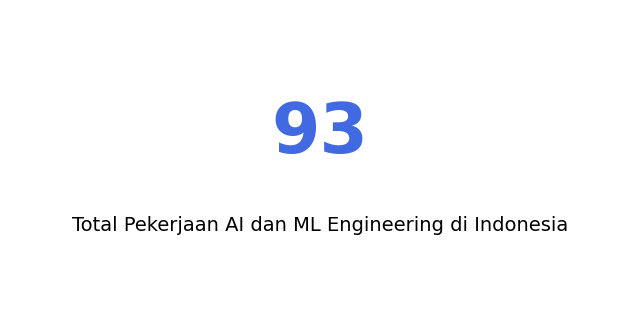

In [5]:
total_jobs = len(jobs_df)

fig, ax = plt.subplots(figsize = (8,4))

ax.text(
    0.5,0.6,
    f"{total_jobs:,}",
    fontsize = 50,
    fontweight = "bold",
    ha = "center", va="center",color="royalblue"
)

ax.text(
    0.5,0.3,
    "Total Pekerjaan AI dan ML Engineering di Indonesia",
    fontsize = 14,
    ha="center", va="center"
)
ax.axis("off")
plt.show()

#### Req 2. Berapa jumlah pekerjaan yang terbuka untuk Fresh Graduate?

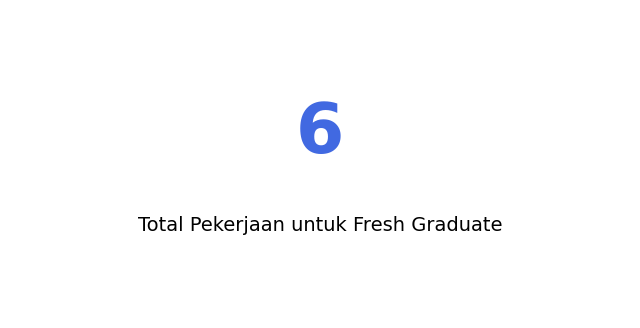

In [6]:
fresh_graduate = jobs_df[jobs_df["min_experience"] == "Fresh Graduate"]
total_freshgraduate = len(fresh_graduate)

fig, ax = plt.subplots(figsize = (8,4))

ax.text(
    0.5,0.6,
    s = f"{total_freshgraduate}",
    fontsize=50,
    fontweight="bold",
    color="royalblue",
    ha="center",va="center"
)

ax.text(
    0.5,0.3,
    s = "Total Pekerjaan untuk Fresh Graduate",
    fontsize=14,
    ha="center",va="center"
)
ax.axis("off")
plt.show()

#### Req 3. Berapa perbandingan peluang kerja AI Engineering dan ML Engineering?

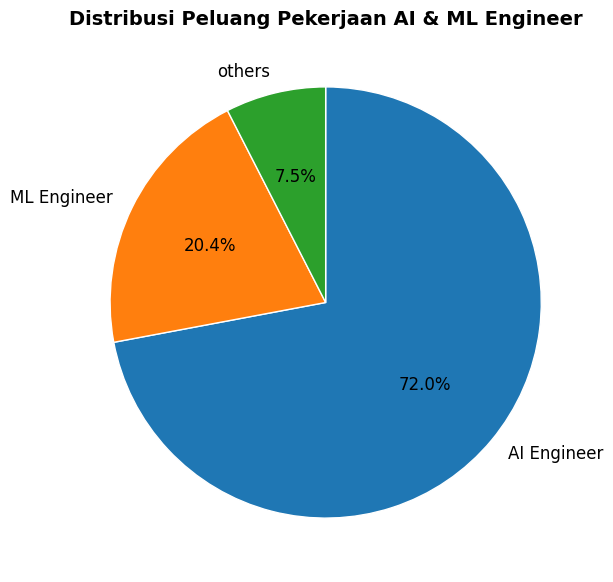

In [7]:
import matplotlib.pyplot as plt

# Ambil data
general_position = jobs_df["general_position"].value_counts()

# Buat pie chart
fig, ax = plt.subplots(figsize=(7,7))

ax.pie(
    general_position,
    labels = general_position.index,
    autopct = '%1.1f%%',
    startangle = 90,
    colors=sns.set_palette("pastel"),
    counterclock = False,
    wedgeprops = {"edgecolor":"white"},
    textprops = {"fontsize":"12"}
)
ax.set_title("Distribusi Peluang Pekerjaan AI & ML Engineer", fontsize = 14, fontweight="bold")
plt.show()


In [8]:
jobs_df["min_salary"].value_counts()

min_salary
Negotiable    66
20000000.0     2
12000000.0     2
3000000.0      2
4000000.0      2
7000000.0      2
8000000.0      2
5000000.0      2
7600000.0      2
53630000.0     1
3500000.0      1
1500000.0      1
39963000.0     1
5400000.0      1
5600000.0      1
28545000.0     1
22836000.0     1
3200000.0      1
6000000.0      1
15750000.0     1
Name: count, dtype: int64

#### Req 4. Berapa Gaji Terendah, Tertinggi, Dan Rata-Rata Gaji Yang Ditawarkan Secara Keseluruhan Data?

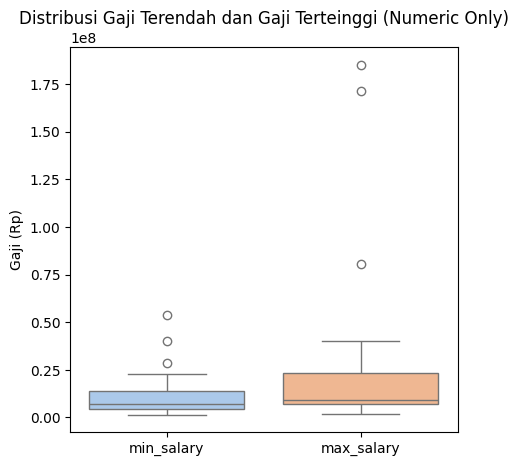

In [9]:
# Filter only numeric value
salary_df = jobs_df.copy()
salary_df = salary_df[pd.to_numeric(salary_df["min_salary"], errors="coerce").notna()]
salary_df = salary_df[pd.to_numeric(salary_df["max_salary"], errors="coerce").notna()]

salary_df["min_salary"] = salary_df['min_salary'].astype('float')
salary_df['max_salary'] = salary_df['max_salary'].astype('float')

# Boxplot for value distribution
plt.figure(figsize=(5,5))
sns.boxplot(data=salary_df[['min_salary','max_salary']])
plt.title('Distribusi Gaji Terendah dan Gaji Terteinggi (Numeric Only)')
plt.ylabel('Gaji (Rp)')
plt.show()

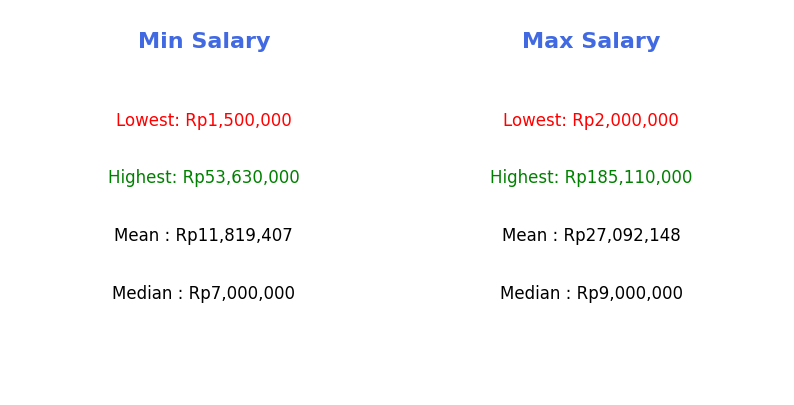

In [10]:
# min_salary summary
lowest_min_salary = min(salary_df['min_salary'])
highest_min_salary = max(salary_df['min_salary'])
mean_min_salary = np.mean(salary_df['min_salary'])
median_min_salary = np.median(salary_df['min_salary'])

# max_salary summary
lowest_max_salary = min(salary_df['max_salary'])
highest_max_salary = max(salary_df['max_salary'])
mean_max_salary = np.mean(salary_df['max_salary'])
median_max_salary = np.median(salary_df['max_salary'])

# viz
fig, ax = plt.subplots(figsize=(10,5))
ax.axis("off")

# Left side KPI
ax.text(0.25, 0.9, s="Min Salary", fontsize=16, fontweight="bold", ha="center", color="royalblue")
ax.text(0.25,0.7, s=f"Lowest: Rp{lowest_min_salary:,.0f}", fontsize=12, ha='center', color="red")
ax.text(0.25, 0.55, s=f"Highest: Rp{highest_min_salary:,.0f}", fontsize=12, ha='center', color="green")
ax.text(0.25, 0.4, s=f"Mean : Rp{mean_min_salary:,.0f}", fontsize=12, ha="center")
ax.text(0.25, 0.25, s=f"Median : Rp{median_min_salary:,.0f}", fontsize=12, ha="center")

# Right side KPI
ax.text(0.75, 0.9, s="Max Salary", fontsize=16, fontweight="bold", ha="center", color="royalblue")
ax.text(0.75,0.7, s=f"Lowest: Rp{lowest_max_salary:,.0f}", fontsize=12, ha='center', color="red")
ax.text(0.75, 0.55, s=f"Highest: Rp{highest_max_salary:,.0f}", fontsize=12, ha='center', color="green")
ax.text(0.75, 0.4, s=f"Mean : Rp{mean_max_salary:,.0f}", fontsize=12, ha="center")
ax.text(0.75, 0.25, s=f"Median : Rp{median_max_salary:,.0f}", fontsize=12, ha="center")

plt.show()


#### Req 5. Berapa Persen Gaji Terendah, Tertinggi, Dan Rata-Rata Gaji Yang Ditawarkan Berdasarkan Umr Lokasi Yang Ditawarkan?

In [11]:
jobs_df['Location'].value_counts()

Location
Jakarta                    67
Others                      8
Indonesia (unspecified)     6
Jawa Barat                  5
DIY                         3
Banten                      3
Jawa Timur                  1
Name: count, dtype: int64

#### Req 6. Berapa yang menawarkan kerja penuh dan paruh waktu?

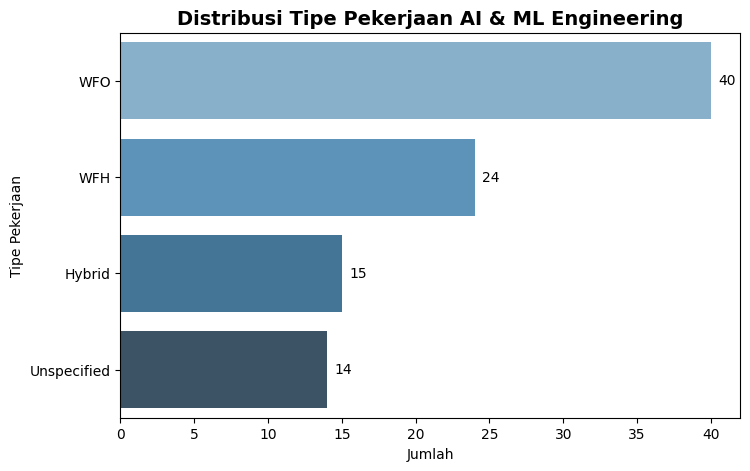

In [17]:
jobs_type = jobs_df["type"].value_counts().reset_index()
jobs_type.columns = ["type","count"]

# bar chart
plt.figure(figsize=(8,5))
sns.barplot(
    data = jobs_type,
    x="count",
    y="type",
    palette="Blues_d"
)

for i, v in enumerate(jobs_type["count"]):
    plt.text(v + 0.5, i, str(v), va="center")

plt.title("Distribusi Tipe Pekerjaan AI & ML Engineering", fontsize = 14, fontweight="bold")
plt.xlabel("Jumlah")
plt.ylabel("Tipe Pekerjaan")
plt.show()


#### Req 6. Berapa yang menawarkan kerja WFH dan WFO?

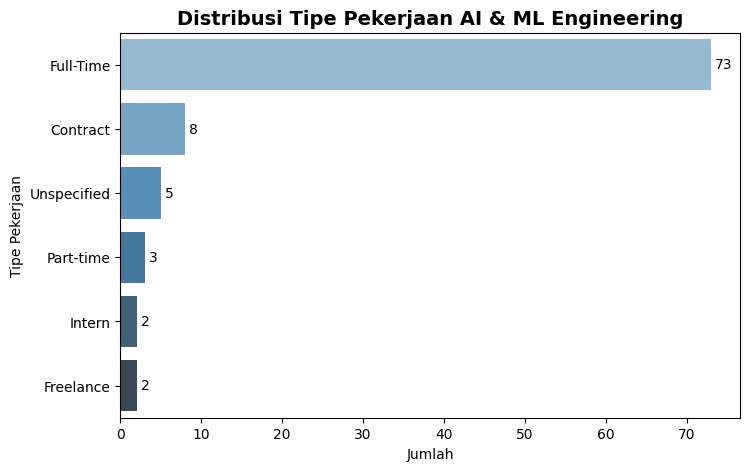

In [24]:
category_type = jobs_df["normalize_category"].value_counts().reset_index()
category_type.columns = ["normalize_category","count"]

# bar chart
plt.figure(figsize=(8,5))
sns.barplot(
    data = category_type,
    x="count",
    y="normalize_category",
    palette="Blues_d"
)

for i, v in enumerate(category_type["count"]):
    plt.text(v + 0.5, i, str(v), va="center")

plt.title("Distribusi Tipe Pekerjaan AI & ML Engineering", fontsize = 14, fontweight="bold")
plt.xlabel("Jumlah")
plt.ylabel("Tipe Pekerjaan")
plt.show()
